In [1]:
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

import yfinance as yf
import pandas as pd
import numpy as np
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error


In [3]:
#SPY = SP500
tickers = ['SPY', 'AAL', 'AMZN', 'PFE', 'DB', 'WMT']
start_date='2012-01-01'
end_date='2022-10-14'
snp = yf.download(tickers[0], start=start_date, end=end_date)
american = yf.download(tickers[1], start=start_date, end=end_date)
amazon = yf.download(tickers[2], start=start_date, end=end_date)
pfizer = yf.download(tickers[3], start=start_date, end=end_date)
d_bank = yf.download(tickers[4], start=start_date, end=end_date)
walmart = yf.download(tickers[5], start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
snp = snp[["Adj Close"]]
snp.rename(columns={'Adj Close':'adj_close'}, inplace=True)
american = american[["Adj Close"]]
american.rename(columns={'Adj Close':'adj_close'}, inplace=True)
amazon = amazon[["Adj Close"]]
amazon.rename(columns={'Adj Close':'adj_close'}, inplace=True)
pfizer = pfizer[["Adj Close"]]
pfizer.rename(columns={'Adj Close':'adj_close'}, inplace=True)
d_bank = d_bank[["Adj Close"]]
d_bank.rename(columns={'Adj Close':'adj_close'}, inplace=True)
walmart = walmart[["Adj Close"]]
walmart.rename(columns={'Adj Close':'adj_close'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')

#S&P 500

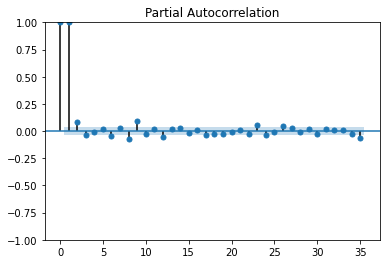

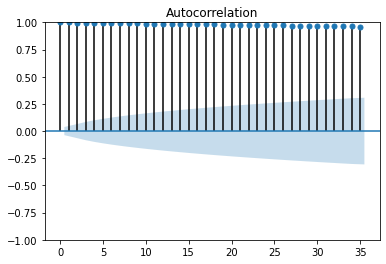

In [6]:
plot_pacf(snp);
plot_acf(snp);

In [7]:
ad_fuller_result = adfuller(snp.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.651969064248096
p-value: 4.636349784764028e-19


In [8]:
train = snp.iloc[:int(snp.shape[0]*0.8)]
test = snp.iloc[int(snp.shape[0]*0.8):]

In [9]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
mape = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    mape.append(mean_absolute_percentage_error(preds, valid_value))

In [ ]:
mape

In [ ]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [ ]:
preds, conf_int = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0], return_conf_int=True)

In [ ]:
preds = pd.DataFrame(preds)
preds.index = test.index

In [ ]:
plt.plot(preds, label = 'Prediction')
plt.plot(snp, label = 'Train')
plt.plot(test, label = 'Actual')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("S&P 500 Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [ ]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

#AAL

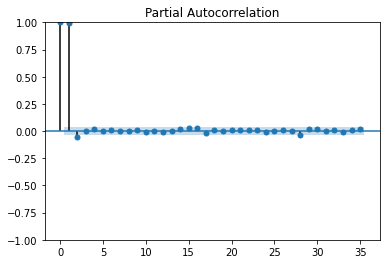

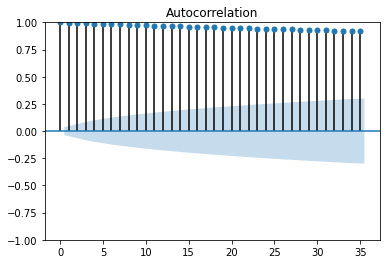

In [11]:
plot_pacf(american);
plot_acf(american);

In [12]:
ad_fuller_result = adfuller(american.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -48.83887977556137
p-value: 0.0


In [13]:
train = american.iloc[:int(american.shape[0]*0.8)]
test = american.iloc[int(american.shape[0]*0.8):]

In [ ]:
mape = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    mape.append(mean_absolute_percentage_error(preds, valid_value))

In [ ]:
mape

In [ ]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [ ]:
preds, conf_int = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0], return_conf_int=True)

In [ ]:
preds = pd.DataFrame(preds)
preds.index = test.index

In [ ]:
plt.plot(preds, label = 'Prediction')
plt.plot(american, label = 'Train')
plt.plot(test, label = 'Actual')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("American Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [ ]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

#Amazon

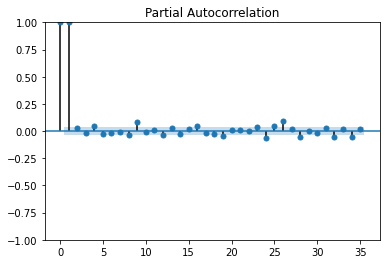

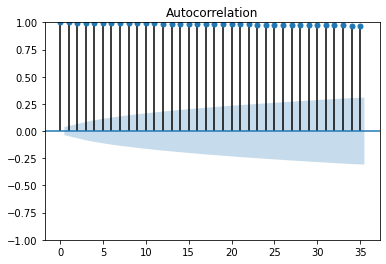

In [14]:
plot_pacf(amazon);
plot_acf(amazon);

In [15]:
ad_fuller_result = adfuller(amazon.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -11.017131969118763
p-value: 6.116572709856831e-20


In [16]:
train = amazon.iloc[:int(amazon.shape[0]*0.8)]
test = amazon.iloc[int(amazon.shape[0]*0.8):]

In [ ]:
mape = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2,1,0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    mape.append(mean_absolute_percentage_error(preds, valid_value))

In [ ]:
mape

In [ ]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [ ]:
preds, conf_int = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0], return_conf_int=True)

In [ ]:
preds = pd.DataFrame(preds)
preds.index = test.index

In [ ]:
plt.plot(preds, label = 'Prediction')
plt.plot(amazon, label = 'Train')
plt.plot(test, label = 'Actual')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("Amazon Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [ ]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

#Pfizer

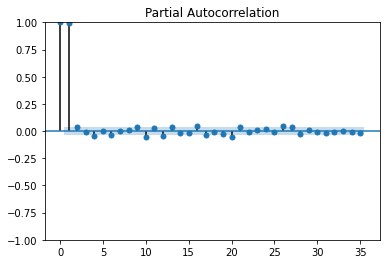

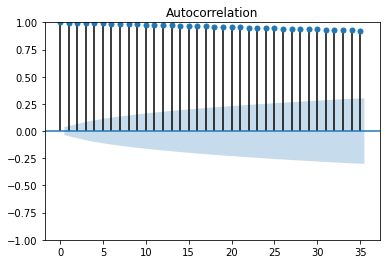

In [17]:
plot_pacf(pfizer);
plot_acf(pfizer);

In [18]:
ad_fuller_result = adfuller(pfizer.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.583525897147599
p-value: 6.808709928033863e-19


In [19]:
train = pfizer.iloc[:int(pfizer.shape[0]*0.8)]
test = pfizer.iloc[int(pfizer.shape[0]*0.8):]

In [ ]:
mape = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2,1,0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    mape.append(mean_absolute_percentage_error(preds, valid_value))

In [ ]:
mape

In [ ]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [ ]:
preds, conf_int = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0], return_conf_int=True)

In [ ]:
preds = pd.DataFrame(preds)
preds.index = test.index

In [ ]:
plt.plot(preds, label = 'Prediction')
plt.plot(pfizer, label = 'Train')
plt.plot(test, label = 'Actual')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("Pfizer Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [ ]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

#Deutsche

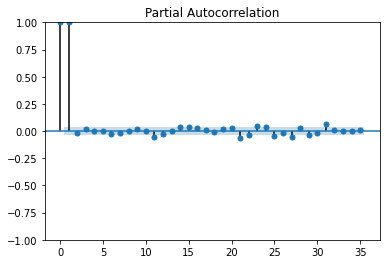

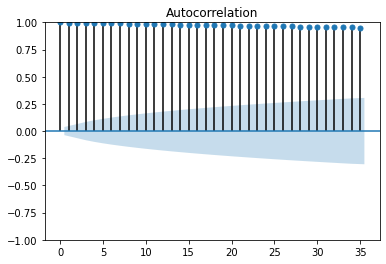

In [20]:
plot_pacf(d_bank);
plot_acf(d_bank);

In [21]:
ad_fuller_result = adfuller(d_bank.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.618628052665592
p-value: 5.5898326458288e-19


In [22]:
train = d_bank.iloc[:int(d_bank.shape[0]*0.8)]
test = d_bank.iloc[int(d_bank.shape[0]*0.8):]

In [ ]:
mape = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2,1,0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    mape.append(mean_absolute_percentage_error(preds, valid_value))

In [ ]:
mape

In [ ]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [ ]:
preds, conf_int = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0], return_conf_int=True)

In [ ]:
preds = pd.DataFrame(preds)
preds.index = test.index

In [ ]:
plt.plot(preds, label = 'Prediction')
plt.plot(d_bank, label = 'Train')
plt.plot(test, label = 'Actual')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("Deutsche Bank Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [ ]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))

#Walmart

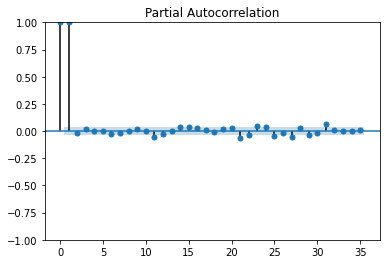

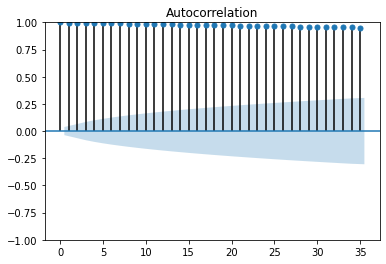

In [23]:
plot_pacf(d_bank);
plot_acf(d_bank);

In [24]:
ad_fuller_result = adfuller(d_bank.diff().dropna())
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.618628052665592
p-value: 5.5898326458288e-19


In [25]:
train = d_bank.iloc[:int(d_bank.shape[0]*0.8)]
test = d_bank.iloc[int(d_bank.shape[0]*0.8):]

In [ ]:
mape = []
tscv = TimeSeriesSplit(max_train_size = None, n_splits = 3)
for train_index, valid_index in tscv.split(train):
    train_value, valid_value = train.iloc[train_index, :], train.iloc[valid_index, :]
    model = SARIMAX(train_value, order=(2,1,0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)
    # Fit the model 
    preds = model.predict(start=train_value.shape[0]+1, end = train_value.shape[0]+valid_value.shape[0])
    mape.append(mean_absolute_percentage_error(preds, valid_value))

In [ ]:
mape

In [ ]:
model = SARIMAX(train, order=(2, 1, 0), seasonal_order=(0, 1, 0, 252)).fit(disp=-1)

In [ ]:
preds, conf_int = model.predict(start=train.shape[0]+1, end = train.shape[0]+test.shape[0], return_conf_int=True)

In [ ]:
preds = pd.DataFrame(preds)
preds.index = test.index

In [ ]:
plt.plot(preds, label = 'Prediction')
plt.plot(d_bank, label = 'Train')
plt.plot(test, label = 'Actual')
plt.fill_between(test.index, conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')

plt.title("Deutsche Bank Forecast")
plt.xlabel("Year")
plt.ylabel("Adjusted Close")
plt.legend(loc='upper left')

In [ ]:
print("MSE: %.3f" % mean_squared_error(test, preds))
print("MSLE: %.3f" % mean_squared_log_error(test, preds))
print("MAPE: %.3f" % mean_absolute_percentage_error(test, preds))